<b>Analysing the covid-19 dataset and predicting the number of cases,deaths and recoverd worldwide for the next month.</b>

In [152]:
# Importing suitable libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [157]:
import os

In [158]:
pwd

'C:\\Users\\hp\\Untitled Folder 3'

In [159]:
# Loading all the three time series data sets which contain the total number of cases, deaths, recovery from 22nd January 2020
# to 23rd March 2020
confirmed_cases = pd.read_csv(r"C:\\Users\\hp\\Untitled Folder 3\time_series_19-covid-Confirmed.csv")
deaths_reported = pd.read_csv(r"C:\\Users\\hp\\Untitled Folder 3\time_series_19-covid-Deaths.csv")
recovered_cases = pd.read_csv(r"C:\\Users\\hp\\Untitled Folder 3\time_series_19-covid-Recovered.csv")

In [160]:
# Display the head of the dataset
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [161]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [162]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


In [163]:
# Extracting all the columns names in the confirmed cases data set
cols = confirmed_cases.keys()

In [164]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [165]:
#Extracting only the dates columns that have information of confr=irmed,deaths and reciovered cases
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [166]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [167]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [168]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,2,3,5,7,8,8,14,14,14,19,...,82,114,147,177,212,272,322,411,599,599.0
1,2,1,2,2,4,4,7,7,11,15,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,0,1,3,3,4,5,7,7,10,13,...,212,226,243,266,313,345,385,432,455,455.0
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,0,0,0,3,4,4,4,7,8,8,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [169]:
# Calculating the total number of confirmed cases, death cases and recovered cases and store them in 4 independent empty lists.
dates = confirmed.keys()
total_cases = []
total_deaths = []
total_recovered = []
mortality_rate = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)

In [170]:
#Displaying all the variables
confirmed_sum

336004.0

In [171]:
death_sum

14643.0

In [172]:
recovered_sum

98334.0

In [173]:
#Date wise total cases
total_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708,
 272166,
 304524,
 335955,
 336004.0]

In [211]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58358,
 60694,
 62494,
 64404,
 67003,
 68324,
 70251,
 72624,
 76034,
 78088,
 80840,
 83207,
 84854,
 87256,
 91499,
 97704,
 98334.0]

In [175]:
#Future forecasting for next 21 assuming no lockdown by the the govt
days_in_future = 21
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-21]

In [176]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [177]:
# Now converting all the integers into datetime variables for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [178]:
# For visualization with the latest data of 23rd March
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [179]:
latest_confirmed

0       599.0
1      1086.0
2       455.0
3         2.0
4      1306.0
        ...  
496       0.0
497       0.0
498       0.0
499       0.0
500       0.0
Name: 3/23/20, Length: 501, dtype: float64

In [180]:
latest_deaths

0       1.0
1      40.0
2       2.0
3       0.0
4      10.0
       ... 
496     0.0
497     1.0
498     0.0
499     0.0
500     0.0
Name: 3/23/20, Length: 501, dtype: float64

In [181]:
latest_recoveries

0       44.0
1      235.0
2      144.0
3        1.0
4      139.0
       ...  
496      0.0
497      0.0
498      0.0
499      0.0
500      0.0
Name: 3/23/20, Length: 501, dtype: float64

In [182]:
# The list of unique countries
unique_countries = list(confirmed_cases['Country/Region'].unique())

In [183]:
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [184]:
# Calculating total number of confirmed cases by each country
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1),reverse=True)]    
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()
    


In [185]:
# Number of cases per country region
print('Confirmed cases by Countries/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

Confirmed cases by Countries/Region:
China:81439.0 cases
Italy:59138.0 cases
US:33276.0 cases
Spain:28768.0 cases
Germany:24873.0 cases
Iran:21638.0 cases
France:16044.0 cases
Korea, South:8897.0 cases
Switzerland:7245.0 cases
United Kingdom:5741.0 cases
Netherlands:4216.0 cases
Belgium:3401.0 cases
Austria:3244.0 cases
Norway:2383.0 cases
Sweden:1934.0 cases
Portugal:1600.0 cases
Brazil:1593.0 cases
Denmark:1514.0 cases
Canada:1470.0 cases
Australia:1314.0 cases
Malaysia:1306.0 cases
Turkey:1236.0 cases
Czechia:1120.0 cases
Japan:1086.0 cases
Israel:1071.0 cases
Ireland:906.0 cases
Luxembourg:798.0 cases
Ecuador:789.0 cases
Pakistan:776.0 cases
Cruise Ship:712.0 cases
Poland:634.0 cases
Chile:632.0 cases
Finland:626.0 cases
Greece:624.0 cases
Thailand:599.0 cases
Iceland:568.0 cases
Indonesia:514.0 cases
Saudi Arabia:511.0 cases
Qatar:494.0 cases
Singapore:455.0 cases
Romania:433.0 cases
Slovenia:414.0 cases
India:396.0 cases
Philippines:380.0 cases
Russia:367.0 cases
Peru:363.0 cases

In [186]:
# List of unique provinces
unique_provinces = list(confirmed_cases['Province/State'].unique())
#Those countries which are not province/state
outliers = ['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [187]:
# Finding the number of confirmed cases per, province, state or city
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [188]:
# Number of cases per province/state/city
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 424.0 cases
New South Wales: 533.0 cases
Victoria: 296.0 cases
Queensland: 221.0 cases
South Australia: 100.0 cases
Western Australia: 120.0 cases
Tasmania: 22.0 cases
Northern Territory: 3.0 cases
Ontario: 425.0 cases
Alberta: 259.0 cases
Quebec: 219.0 cases
Washington: 1996.0 cases
New York: 15793.0 cases
California: 1642.0 cases
Massachusetts: 646.0 cases
Diamond Princess: 761.0 cases
Grand Princess: 43.0 cases
Georgia: 600.0 cases
Colorado: 476.0 cases
Florida: 830.0 cases
New Jersey: 1914.0 cases
Oregon: 161.0 cases
Texas: 627.0 cases
Illinois: 1049.0 cases
Pennsylvania: 509.0 cases
Iowa: 90.0 cases
Maryland: 244.0 cases
North Carolina: 302.0 cases
South Carolina: 196.0 cases
Tennessee: 505.0 cases
Virginia: 221.0 cases
Arizona: 152.0 cases
Indiana: 201.0 cases
Kentucky: 99.0 cases
District of Columbia: 102.0 cases
Nevada: 190.0 cases
New Hampshire: 65.0 cases
Minnesota: 169.0 cases
Nebraska: 51.0 cases
Ohio: 355.0 cases
Rhode Island: 83.0 cases
Wisconsin: 381.0 

In [189]:
#Handling missing values
nan_indices = []
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
unique_province = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop()
    province_confirmed_cases.pop(i)

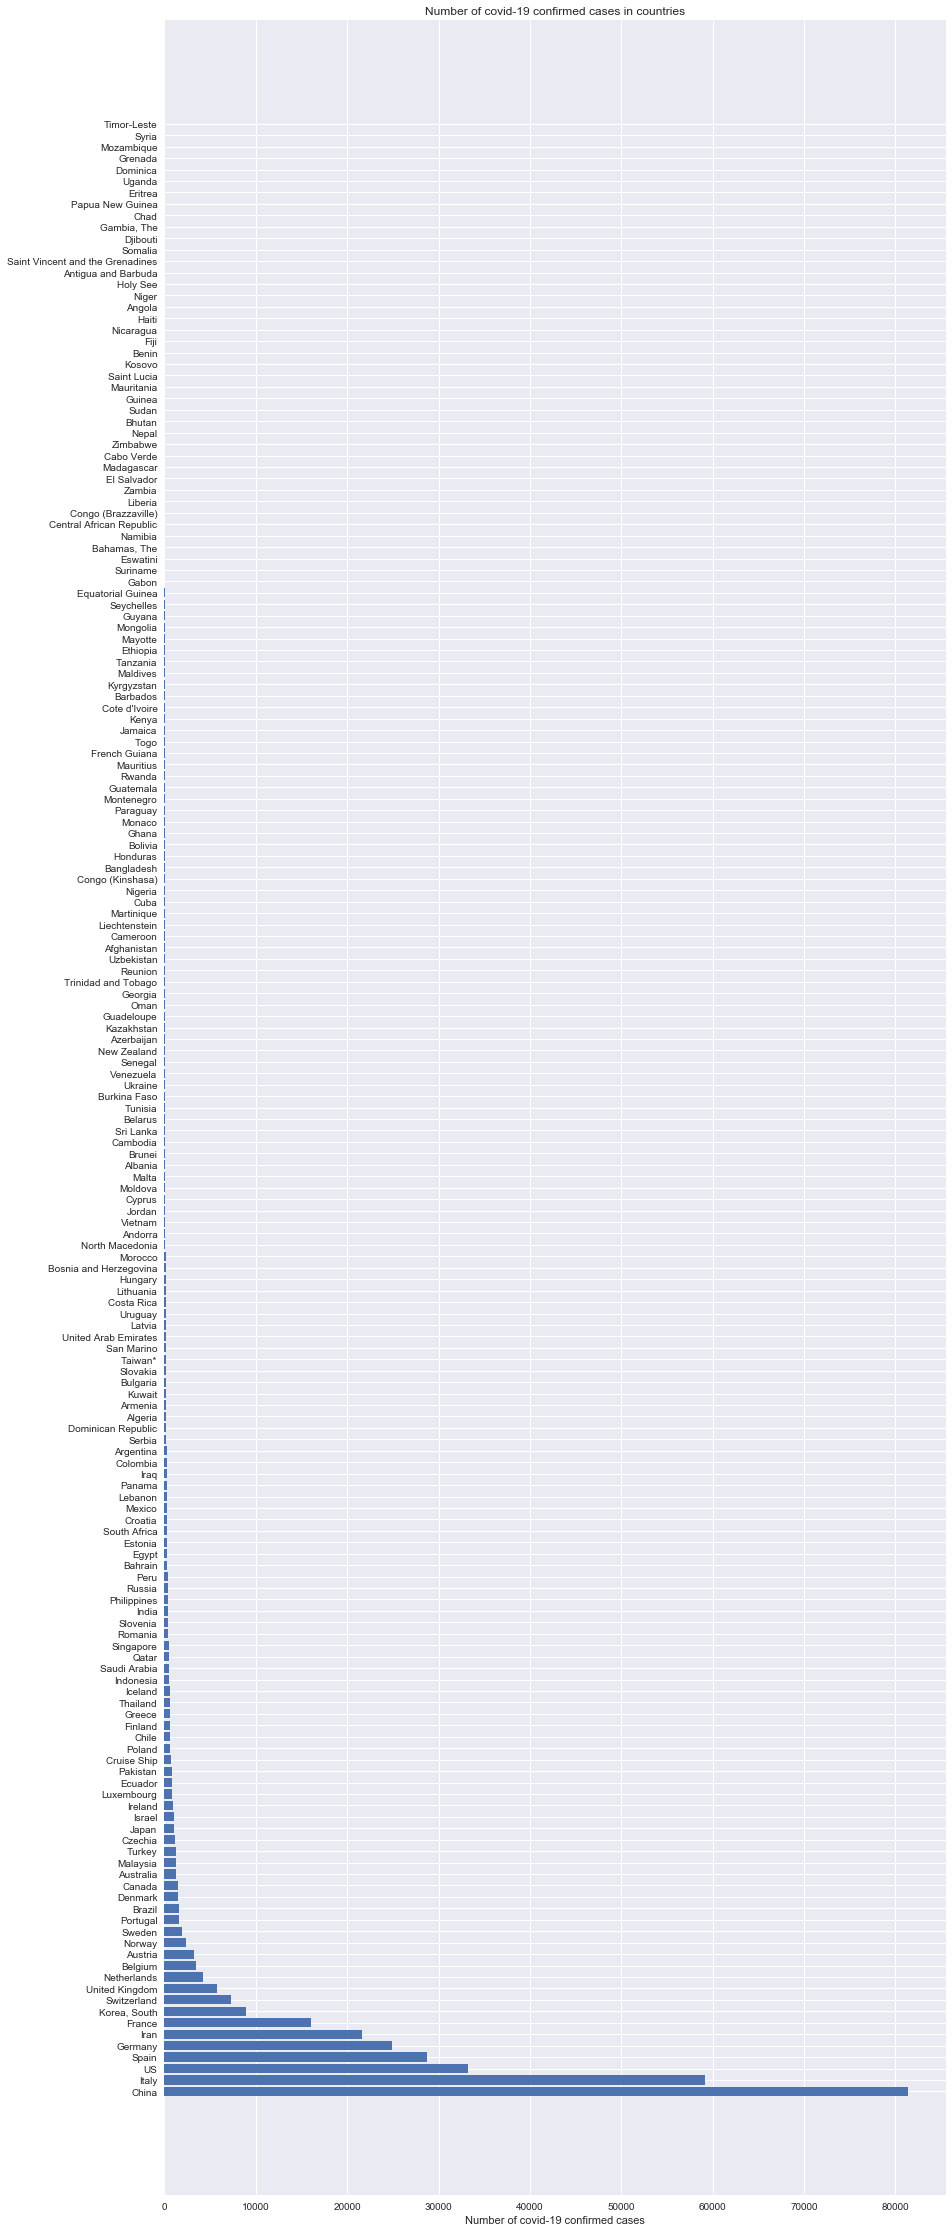

In [190]:
#Plotting a bar graph to see total confirmed cases across different countries
plt.figure(figsize=(14,40))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of covid-19 confirmed cases in countries')
plt.xlabel('Number of covid-19 confirmed cases')
plt.show()

<Figure size 1152x648 with 0 Axes>

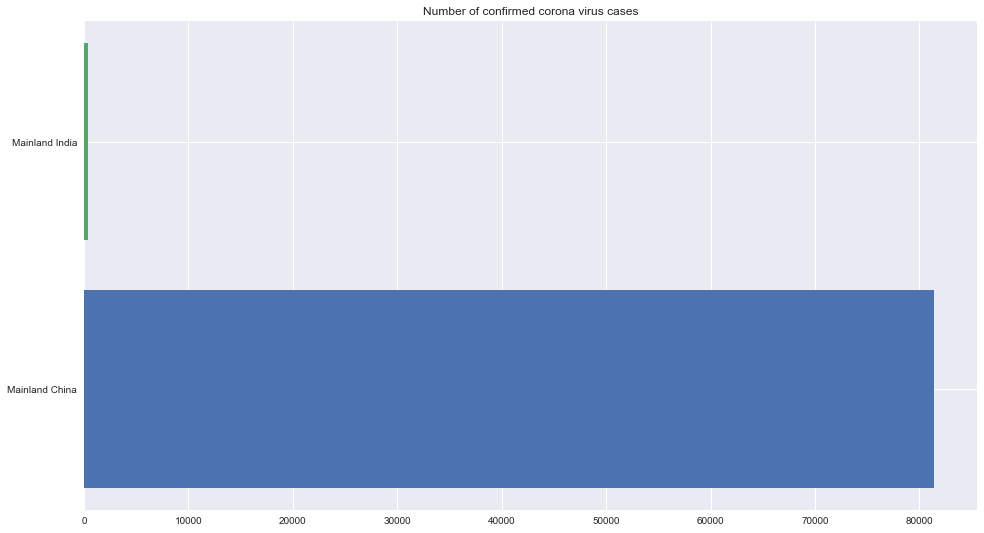

In [191]:
#Plotting a graph to see number of cases in mainland China and mainland India
China_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()

plt.figure(figsize=(16,9))
India_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='India'].sum()

plt.figure(figsize=(16,9))
plt.barh('Mainland China',China_confirmed)
plt.barh('Mainland India',India_confirmed)
plt.title('Number of confirmed corona virus cases')
plt.show()


In [192]:
# Showing top 5 countries with most confirmed cases and India and others are grouped together.
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[5:]) - India_confirmed
for i in range(len(country_confirmed_cases[:5])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
   
visual_unique_countries.append('India')
visual_confirmed_cases.append(India_confirmed)
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

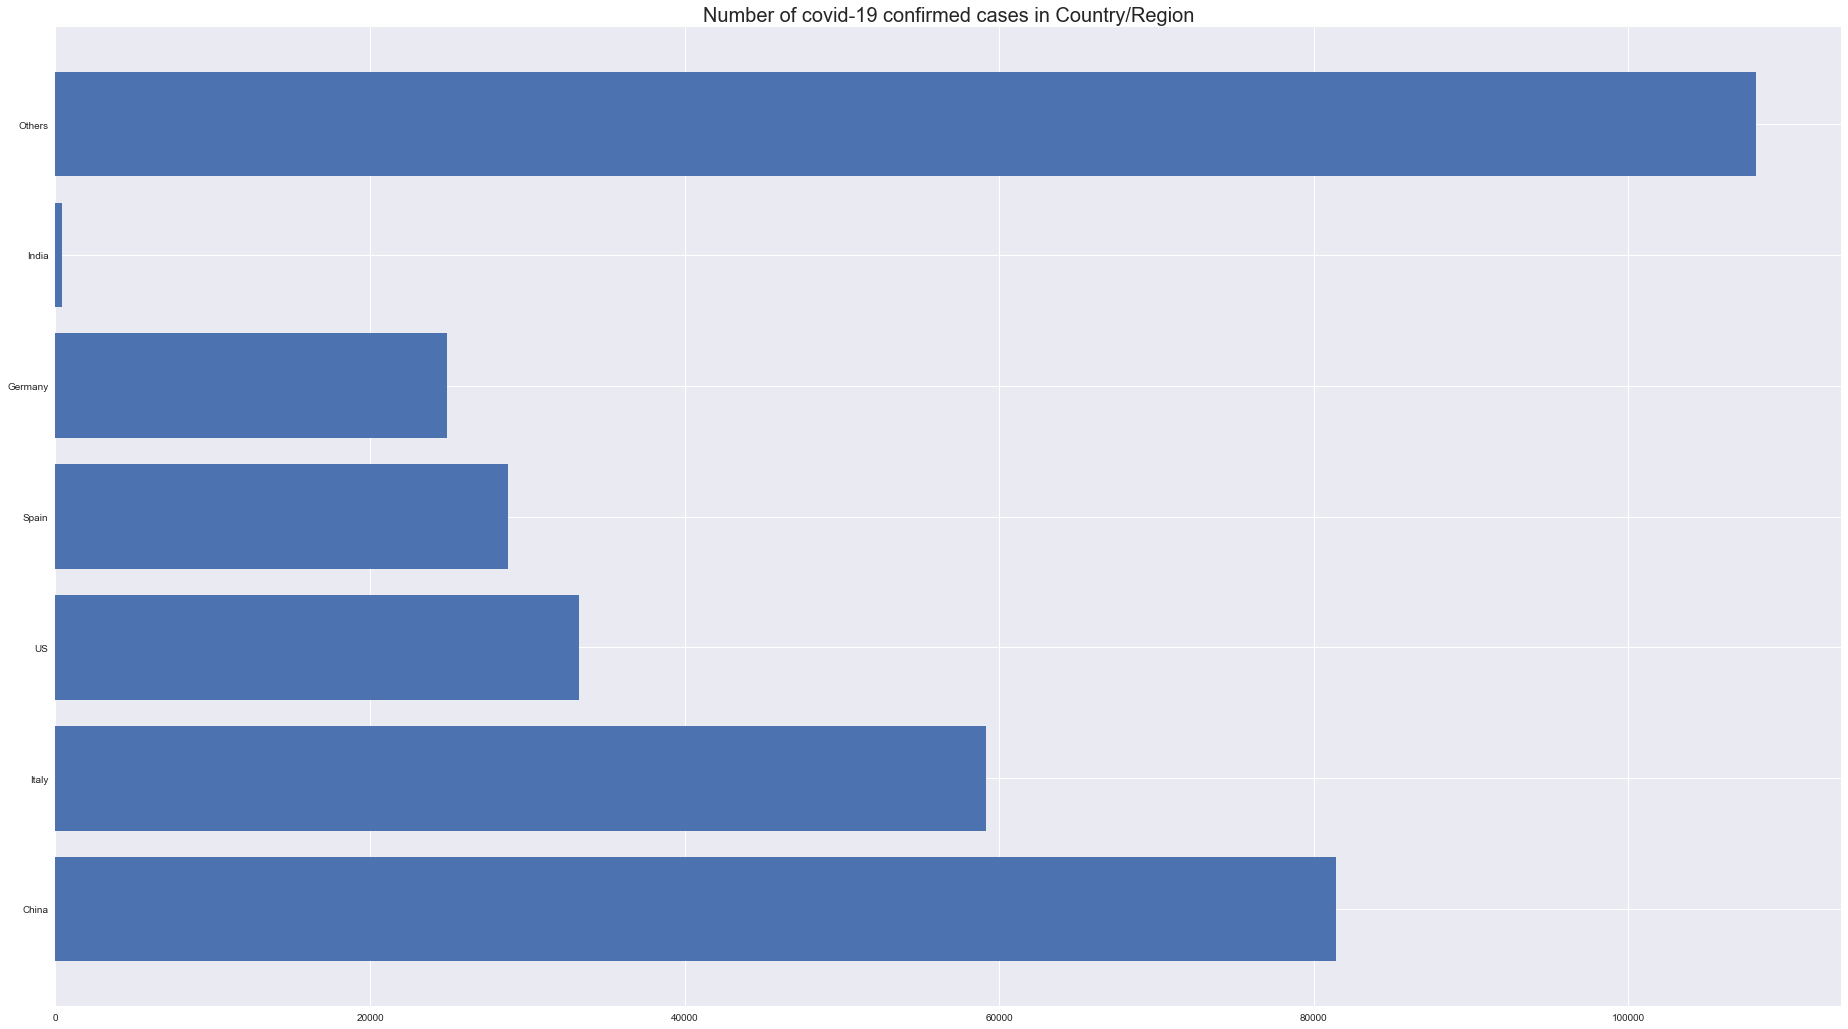

In [193]:
# Visualizing the top 5 countries, China and India
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of covid-19 confirmed cases in Country/Region',size=20)
plt.show()

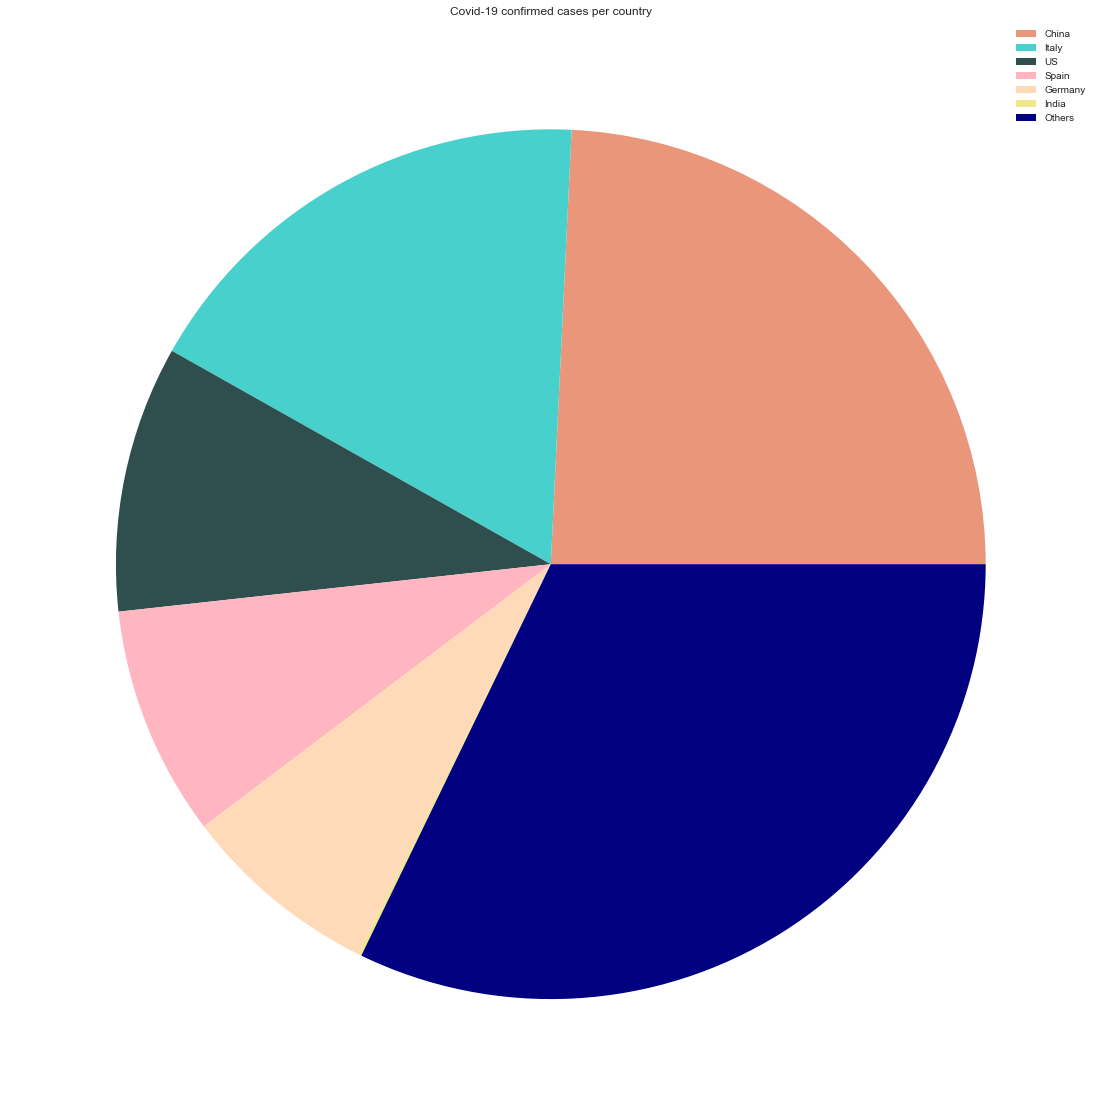

In [194]:
# Plotting the pie chart to visualize the same top 10 countries,India and others
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 confirmed cases per country')
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [197]:
X = np.array([i for i in range(len(dates))]).reshape(-1,1)
y = total_cases
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, y, test_size=0.2, random_state=12)


In [212]:
# Building models
#1st Support vector regression model(svr)
kernel = ['poly','sigmoid','rbf']
c = [.01,.03,.06,.1,3,6,10] #c -> regularization parameter
gamma = [.01,.03,.06,.1,1,3]
epsilon = [.01,.1,1,3]

shrinking = [True,False]
svm_grid = {'kernel' : kernel, 'C' : c, 'gamma' : gamma, 'epsilon' : epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error', cv=3, return_train_score = True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.9s finished
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.03, 0.06, 0.1, 3, 6, 10],
                                        'epsilon': [0.01, 0.1, 1, 3],
                                        'gamma': [0.01, 0.03, 0.06, 0.1, 1, 3],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [213]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 6}

In [214]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [215]:
svm_confirmed

SVR(C=6, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [216]:
svm_pred

array([ 21614.35344444,  21615.43662449,  21623.01888479,  21643.59930563,
        21683.67696724,  21749.75094989,  21848.3203339 ,  21985.8841994 ,
        22168.94162683,  22403.99169628,  22697.53348802,  23056.06608258,
        23486.08856009,  23994.10000049,  24586.59948407,  25270.08609186,
        26051.05890356,  26936.01699959,  27931.45945917,  29043.88536297,
        30279.79379307,  31645.6838287 ,  33148.05454956,  34793.40503536,
        36588.23436962,  38539.04162727,  40652.32589279,  42934.58624397,
        45392.32176148,  48032.03152786,  50860.2146238 ,  53883.37012993,
        57107.99711739,  60540.59467445,  64187.66188561,  68055.69781624,
        72151.20156227,  76480.67219292,  81050.60879265,  85867.51045738,
        90937.87623345,  96268.20523583, 101864.99651848, 107734.74917351,
       113883.96228539, 120319.13492333, 127046.7661718 , 134073.35510765,
       141405.40084587, 149049.40242516, 157011.85890709, 165299.26941429,
       173918.13303124, 1

MAE: 23039.93248204159
MSE: 897693249.0289462


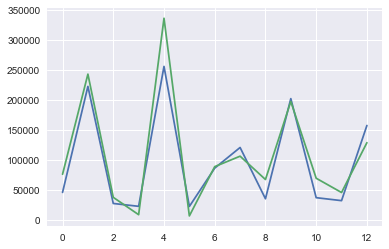

In [217]:
# Check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred,y_test_confirmed))

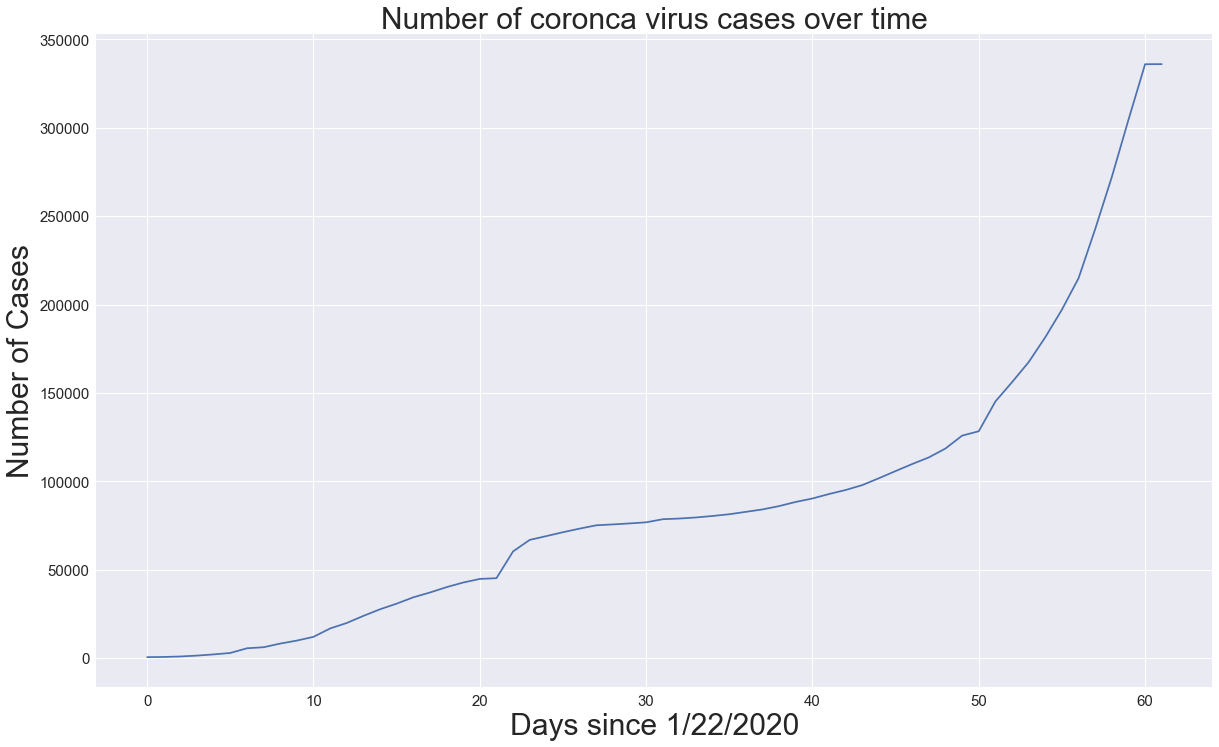

In [219]:
#Total number of coronca cases over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_cases)
plt.title('Number of coronca virus cases over time',size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

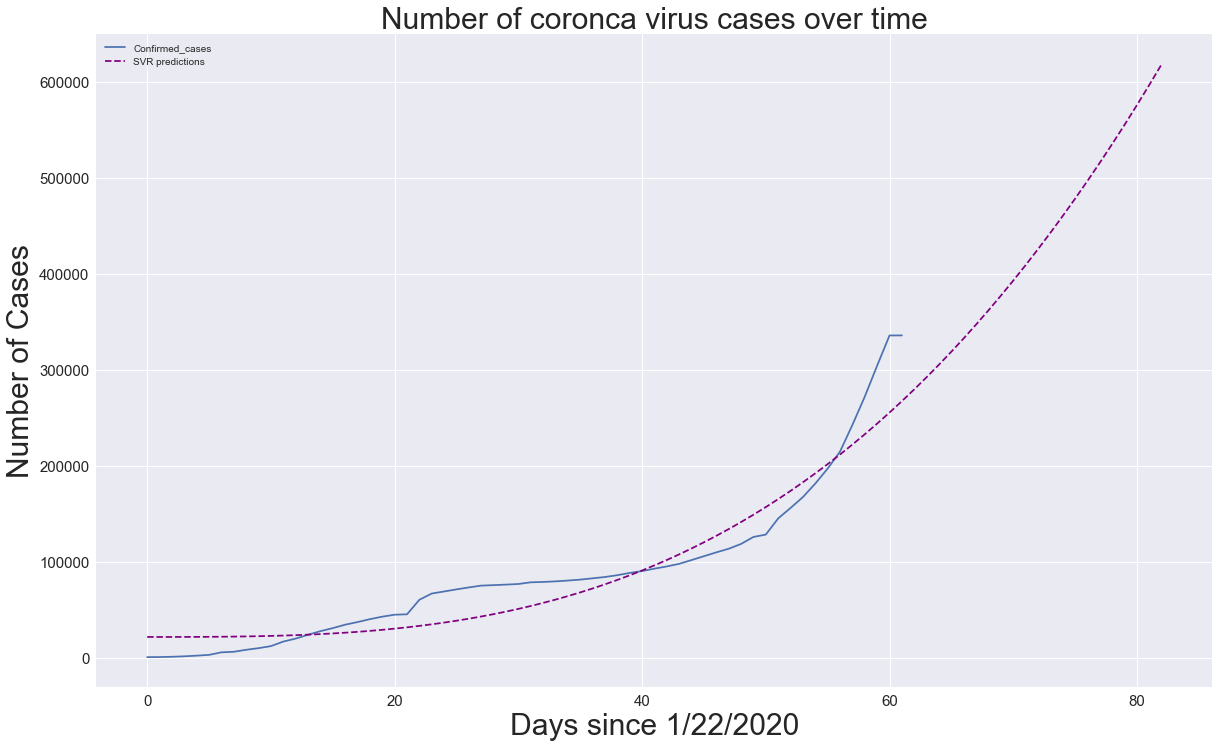

In [221]:
# Confirmed vs Predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_cases)
plt.plot(future_forecast,svm_pred, linestyle='dashed', color='purple')
plt.title('Number of coronca virus cases over time',size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed_cases','SVR predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [223]:
# Predictions for the next 21 days
print('SVR future prediction')
set(zip(future_forecast_dates[-21:], svm_pred[-21:]))

SVR future prediction


{('03/24/2020', 279766.4869283306),
 ('03/25/2020', 292460.2738240826),
 ('03/26/2020', 305563.5028279888),
 ('03/27/2020', 319082.67296348687),
 ('03/28/2020', 333024.2832845318),
 ('03/29/2020', 347394.832967149),
 ('03/30/2020', 362200.8209737408),
 ('03/31/2020', 377448.74638877984),
 ('04/01/2020', 393145.10841880913),
 ('04/02/2020', 409296.4060567486),
 ('04/03/2020', 425909.13838707085),
 ('04/04/2020', 442989.80452476616),
 ('04/05/2020', 460544.90343223687),
 ('04/06/2020', 478580.93443809624),
 ('04/07/2020', 497104.39623008843),
 ('04/08/2020', 516121.7883199322),
 ('04/09/2020', 535639.6095479595),
 ('04/10/2020', 555664.3589986431),
 ('04/11/2020', 576202.5357564556),
 ('04/12/2020', 597260.63902794),
 ('04/13/2020', 618845.1677754986)}

In [225]:
#Now using Linear Regression model to make predictions
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed,y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred,y_test_confirmed))

MAE: 26752.78109880364
MSE: 1973093906.5686147


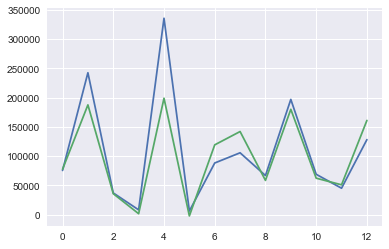

In [226]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

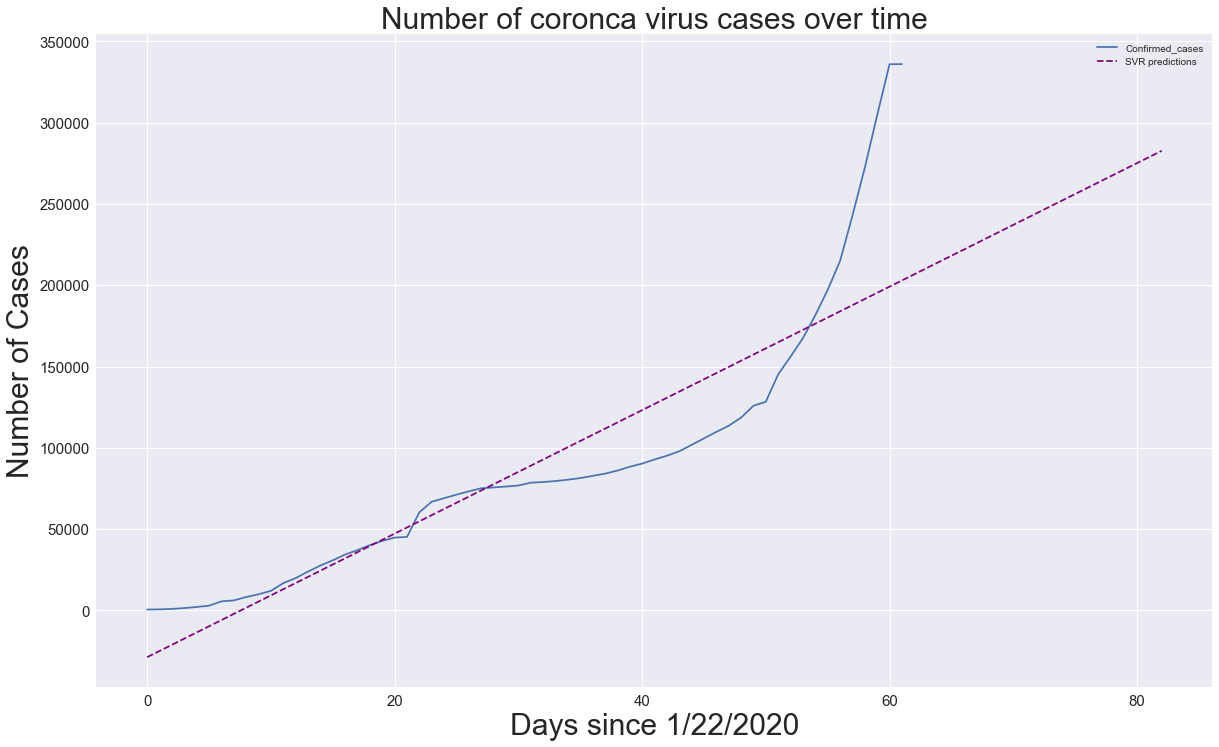

In [227]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_cases)
plt.plot(future_forecast,linear_pred, linestyle='dashed', color='purple')
plt.title('Number of coronca virus cases over time',size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed_cases','SVR predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [228]:
#Predicting cases for next 21 days using Linear Regression
print('Linear Regression future prediction')
set(zip(future_forecast_dates[-21:], linear_pred[-21:]))

Linear Regression future prediction


{('03/24/2020', 206742.39357431297),
 ('03/25/2020', 210540.41336251114),
 ('03/26/2020', 214338.43315070934),
 ('03/27/2020', 218136.45293890755),
 ('03/28/2020', 221934.47272710572),
 ('03/29/2020', 225732.49251530392),
 ('03/30/2020', 229530.5123035021),
 ('03/31/2020', 233328.5320917003),
 ('04/01/2020', 237126.5518798985),
 ('04/02/2020', 240924.57166809667),
 ('04/03/2020', 244722.59145629485),
 ('04/04/2020', 248520.61124449302),
 ('04/05/2020', 252318.63103269125),
 ('04/06/2020', 256116.65082088942),
 ('04/07/2020', 259914.6706090876),
 ('04/08/2020', 263712.69039728574),
 ('04/09/2020', 267510.71018548403),
 ('04/10/2020', 271308.7299736822),
 ('04/11/2020', 275106.7497618804),
 ('04/12/2020', 278904.76955007855),
 ('04/13/2020', 282702.7893382767)}

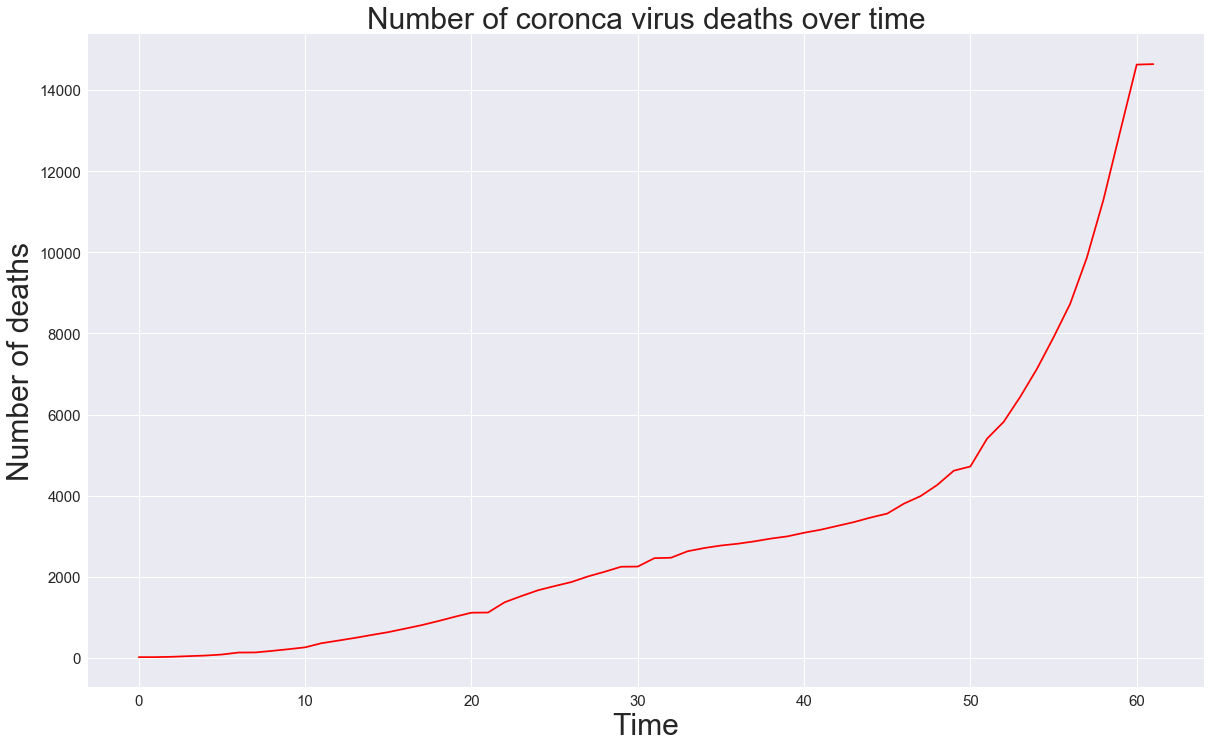

In [229]:
# Total deaths over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths, color='red')
plt.title('Number of coronca virus deaths over time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


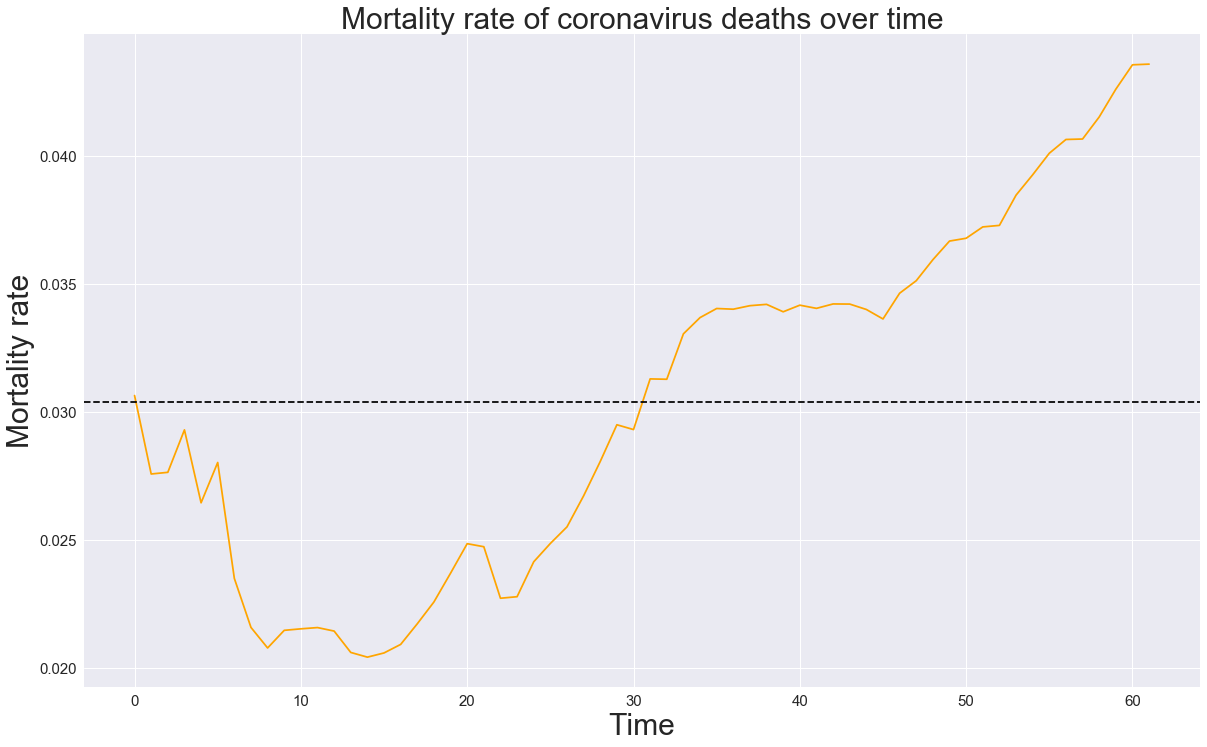

In [230]:
#Total mortality rate of coronavirus overtime
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--',color='black')
plt.title('Mortality rate of coronavirus deaths over time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()



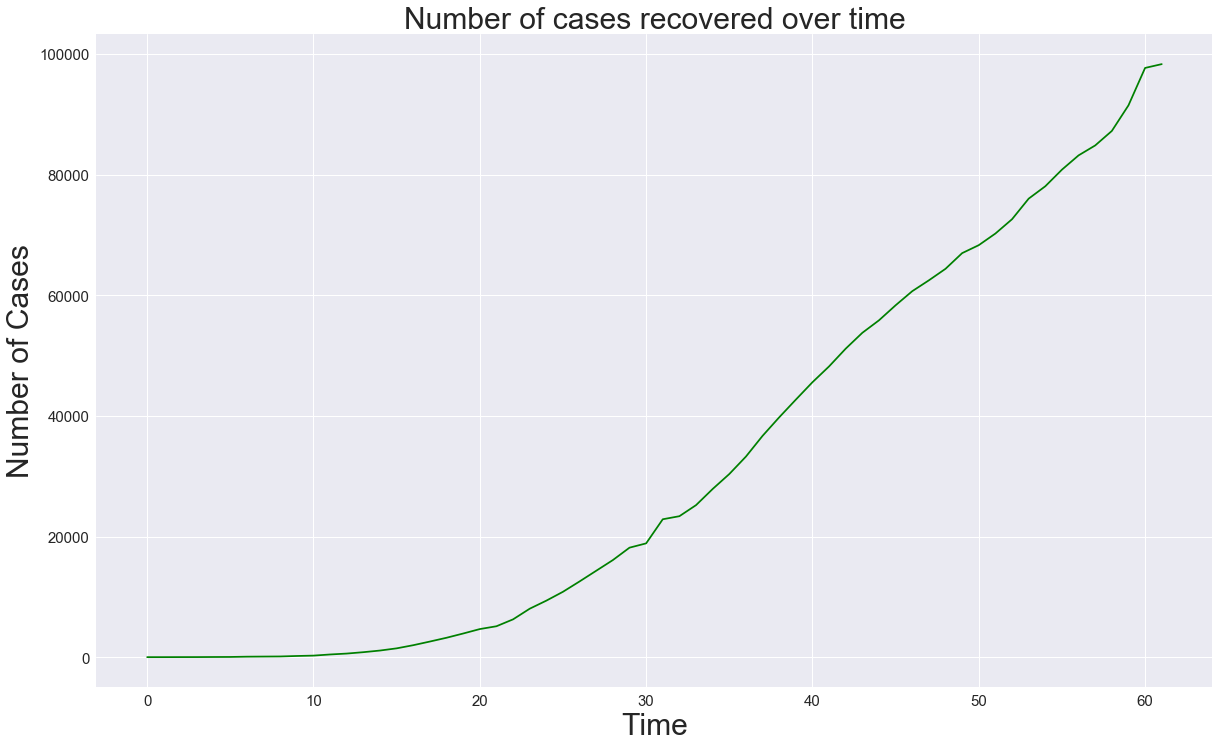

In [231]:
# Cases recovered over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_recovered, color='green')
plt.title('Number of cases recovered over time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

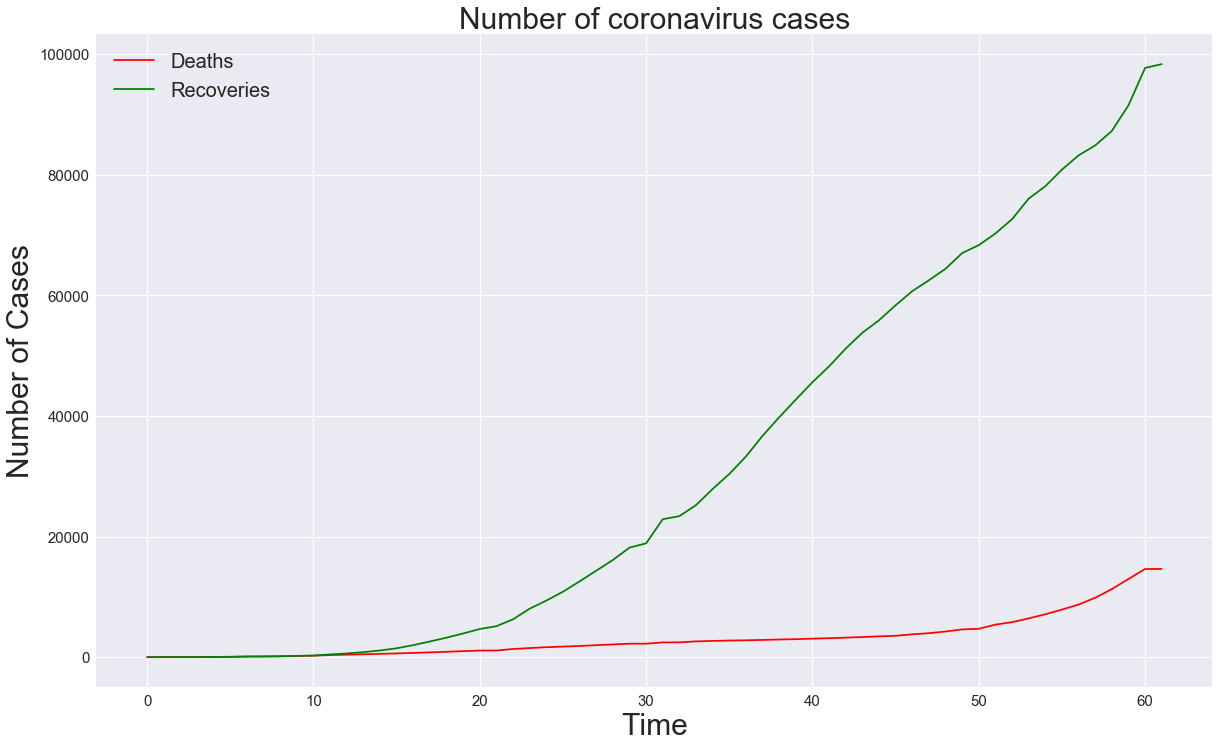

In [232]:
#Number of cases recoverd vs number of deaths
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths, color='red')
plt.plot(adjusted_dates,total_recovered, color='green')
plt.legend(['Deaths','Recoveries'], loc='best', fontsize=20)
plt.title('Number of coronavirus cases',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

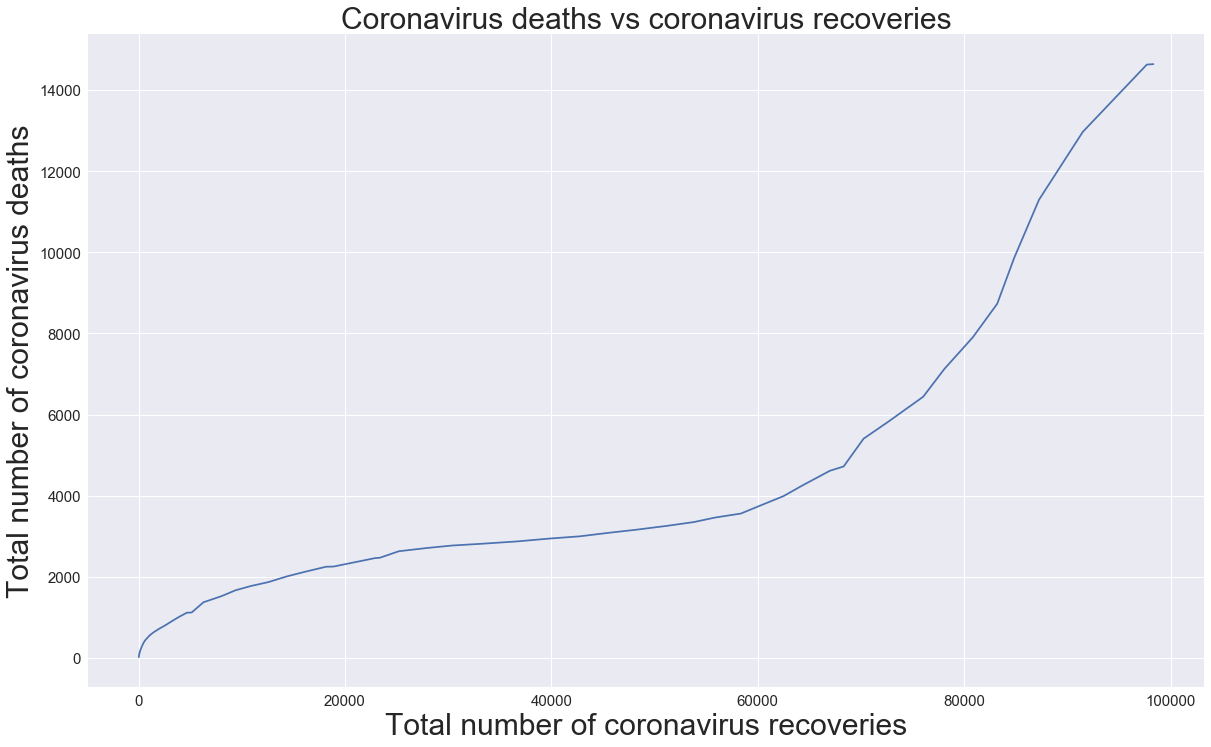

In [233]:
# Coronavirus deaths vs recoveries
plt.figure(figsize=(20,12))
plt.plot(total_recovered,total_deaths)
plt.title('Coronavirus deaths vs coronavirus recoveries',size=30)
plt.xlabel('Total number of coronavirus recoveries', size=30)
plt.ylabel('Total number of coronavirus deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()